In [7]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [8]:
vocab_size = 12000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Display a sample sequence and its label

print("Sample sequence:", X_train[0])
print("Label:", y_train[0])


Sample sequence: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1


In [10]:
# prompt: pad sequences

max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print("Padded sample sequence:", X_train[0])
print("Padded sequence length",len(X_train[0]))


Padded sample sequence: [    5    25   100    43   838   112    50   670     2     9    35   480
   284     5   150     4   172   112   167     2   336   385    39     4
   172  4536  1111    17   546    38    13   447     4   192    50    16
     6   147  2025    19    14    22     4  1920  4613   469     4    22
    71    87    12    16    43   530    38    76    15    13  1247     4
    22    17   515    17    12    16   626    18     2     5    62   386
    12     8   316     8   106     5     4  2223  5244    16   480    66
  3785    33     4   130    12    16    38   619     5    25   124    51
    36   135    48    25  1415    33     6    22    12   215    28    77
    52     5    14   407    16    82 10311     8     4   107   117  5952
    15   256     4     2     7  3766     5   723    36    71    43   530
   476    26   400   317    46     7     4     2  1029    13   104    88
     4   381    15   297    98    32  2071    56    26   141     6   194
  7486    18     4   226   

In [11]:
# Convert labels to NumPy arrays
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

In [12]:
#Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.4),
    LSTM(32),
    Dropout(0.4),
    Dense(1,
    activation='sigmoid', kernel_regularizer =l2(0.01))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [14]:
model_1 = model.fit(
    X_train_part, y_train_part,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_accuracy',patience=4,
    restore_best_weights=True)],
    verbose= 1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.6056 - loss: 0.6587 - val_accuracy: 0.8582 - val_loss: 0.3608
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8878 - loss: 0.3176 - val_accuracy: 0.8582 - val_loss: 0.3373
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9254 - loss: 0.2364 - val_accuracy: 0.8782 - val_loss: 0.3201
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9475 - loss: 0.1868 - val_accuracy: 0.8744 - val_loss: 0.3399
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9619 - loss: 0.1497 - val_accuracy: 0.8654 - val_loss: 0.3930
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9682 - loss: 0.1293 - val_accuracy: 0.8678 - val_loss: 0.4000
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9743 - loss: 0.1135 - val_accuracy: 0.8628 - val_loss: 0.4507


In [15]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.3519
Test Accuracy: 0.8597


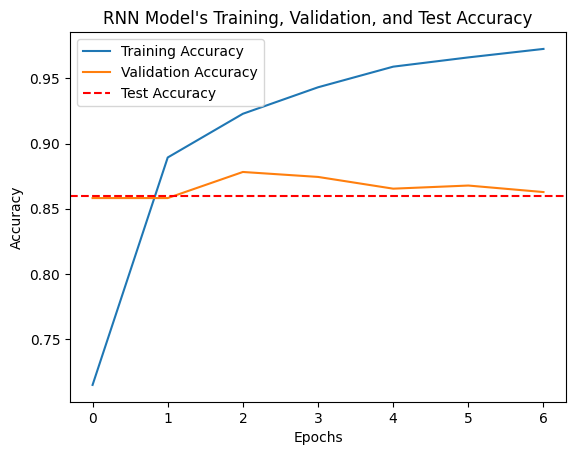

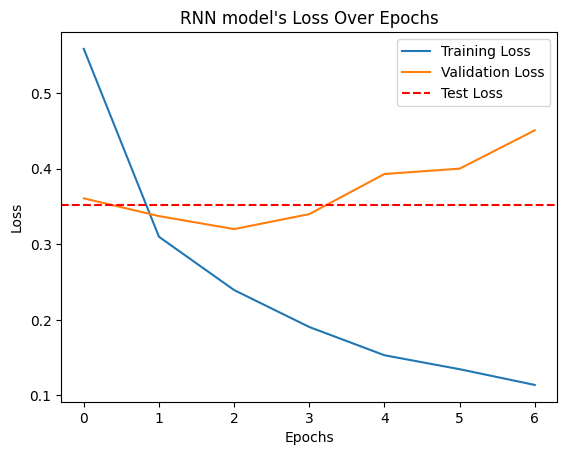

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(model_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')

# Add test accuracy as a horizontal line
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')

# Customize plot
plt.title("RNN Model's Training, Validation, and Test Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation loss
plt.plot(model_1.history['loss'], label='Training Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')

# Add test accuracy as a horizontal line
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')

plt.title("RNN model's Loss Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Define the FFNN model
ffnn_model = Sequential([
    # Embedding layer: Converts word indices to dense vectors
    Embedding(input_dim=10000, output_dim=128, input_length=100),

    # Flatten layer: Reduces (batch_size, sequence_length, embedding_dim)
    #                to (batch_size, sequence_length * embedding_dim)
    Flatten(),

    # Fully connected Dense layer
    Dense(64, activation='relu'),
    Dropout(0.4),  # Add dropout for regularization
    Dense(32, activation='relu'),
    Dropout(0.4),  # Add dropout for regularization
    # Output layer: Single neuron for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the FFNN model
ffnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
# Train the FFNN model
ffnn_history = ffnn_model.fit(
    X_train_part, y_train_part,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6333 - loss: 0.6089 - val_accuracy: 0.8432 - val_loss: 0.3576
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9402 - loss: 0.1747 - val_accuracy: 0.8542 - val_loss: 0.3790
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0297 - val_accuracy: 0.8556 - val_loss: 0.6093
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9972 - loss: 0.0098 - val_accuracy: 0.8426 - val_loss: 0.7753


In [19]:
# Evaluate the FFNN model
ffnn_test_loss, ffnn_test_accuracy = ffnn_model.evaluate(X_test, y_test, verbose=0)

print(f"FFNN Test Accuracy: {ffnn_test_accuracy:.4f}")

FFNN Test Accuracy: 0.8356


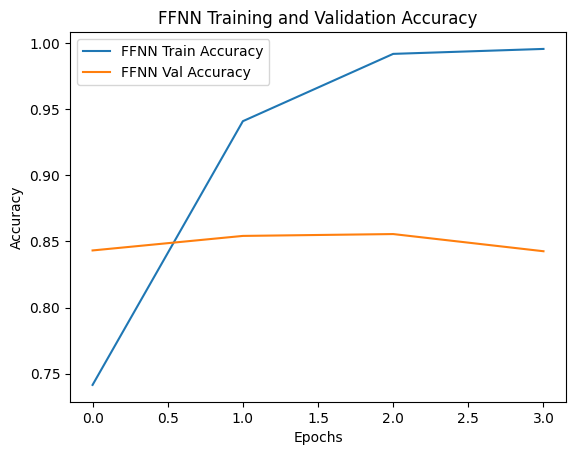

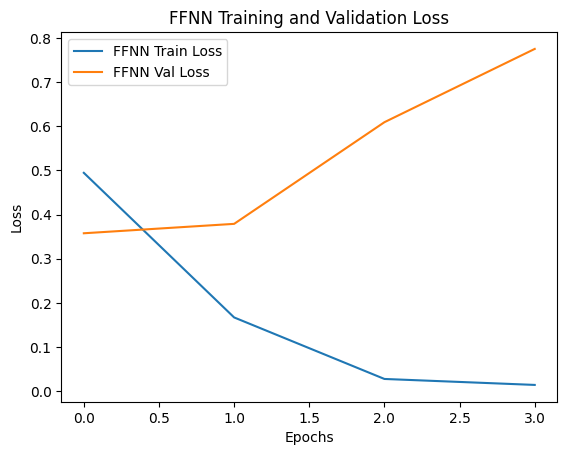

In [20]:
# Plot training and validation accuracy
plt.plot(ffnn_history.history['accuracy'], label='FFNN Train Accuracy')
plt.plot(ffnn_history.history['val_accuracy'], label='FFNN Val Accuracy')
plt.title('FFNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(ffnn_history.history['loss'], label='FFNN Train Loss')
plt.plot(ffnn_history.history['val_loss'], label='FFNN Val Loss')
plt.title('FFNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

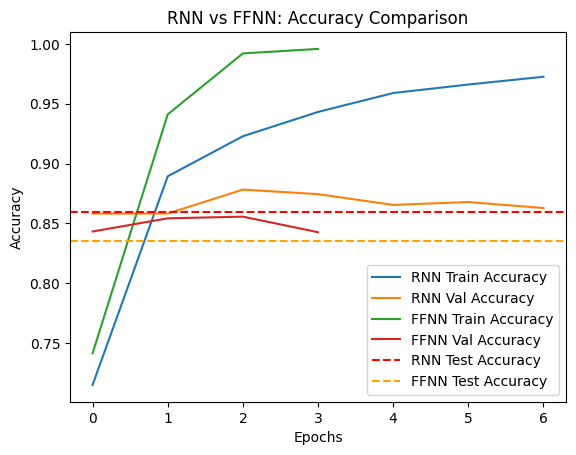

In [21]:
# RNN metrics
plt.plot(model_1.history['accuracy'], label='RNN Train Accuracy')
plt.plot(model_1.history['val_accuracy'], label='RNN Val Accuracy')

# FFNN metrics
plt.plot(ffnn_history.history['accuracy'], label='FFNN Train Accuracy')
plt.plot(ffnn_history.history['val_accuracy'], label='FFNN Val Accuracy')

# Add a horizontal line for test accuracy
plt.axhline(y=test_accuracy, color='red', linestyle='--', label='RNN Test Accuracy')
plt.axhline(y=ffnn_test_accuracy, color='orange', linestyle='--', label='FFNN Test Accuracy')

# Customize plot
plt.title('RNN vs FFNN: Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

RNN:

1. The training accuracy (blue line) gradually improves across epochs.
2. The validation and test accuracy (orange and dashed red lines) remain stable and closely aligned with the training accuracy, indicating that the RNN demonstrates strong generalization.
3. A small gap between training and validation accuracy emerges, suggesting minor overfitting after a few epochs.

FFNN:

1. The training accuracy (green line) rapidly reaches near 100%, reflecting that the model memorizes the training data.
2. The validation and test accuracy (solid red and dashed yellow lines) level off at approximately 82%–83%, showing a significant disparity from the training accuracy.

For the IMDB sentiment analysis task, the RNN is the better choice due to its ability to capture sequential patterns, achieving higher accuracy and better generalization. In contrast, the FFNN is a faster, simpler baseline but lacks the capability to effectively handle sequential data, making it less suitable for this task.


